In [1]:
import statistics as stats
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import numpy as np
import seaborn as sns
import itertools
import random
import pandas as pd
from analysis_functions import *

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# settings for correcting Type3 font errors on HotCRP
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# # change default fonts and font families
# matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['font.family'] = "sans-serif"

plt.rcParams.update({'font.size': 17})

/home/networklab/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [8]:
def barplot_nvars(y, xlabel,ylabel,title,labels,ticks=None,colors = None):
    N = len(y[0])
    print(N)
    ind = np.arange(N)
    plt.figure(figsize=(10,6))
    width = 0.1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "\\", "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    for i in range(len(y)):
        if colors != None:
            plt.bar(ind, y[i], width, label=labels[i], color=colors[i])
        else:
            plt.bar(ind, y[i], width, label=labels[i])
        ind = ind + width
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ind = np.arange(N)
    if (ticks != None):
        plt.xticks(ind + width / 2, ticks, rotation=45)

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

2


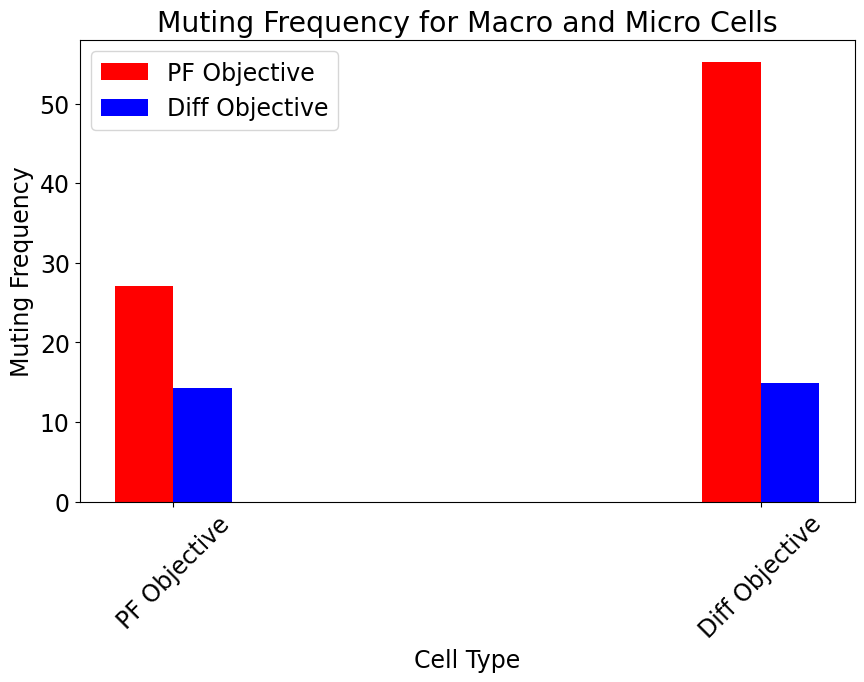

In [9]:
macro_muting_freq = [27.08, 55.27]
micro_muting_freq = [14.32, 14.95]
data = [macro_muting_freq, micro_muting_freq]
labels = ['PF Objective', 'Diff Objective']
barplot_nvars(data, 'Cell Type', 'Muting Frequency', 'Muting Frequency for Macro and Micro Cells', labels, ticks=labels, colors=['r', 'b'])


8


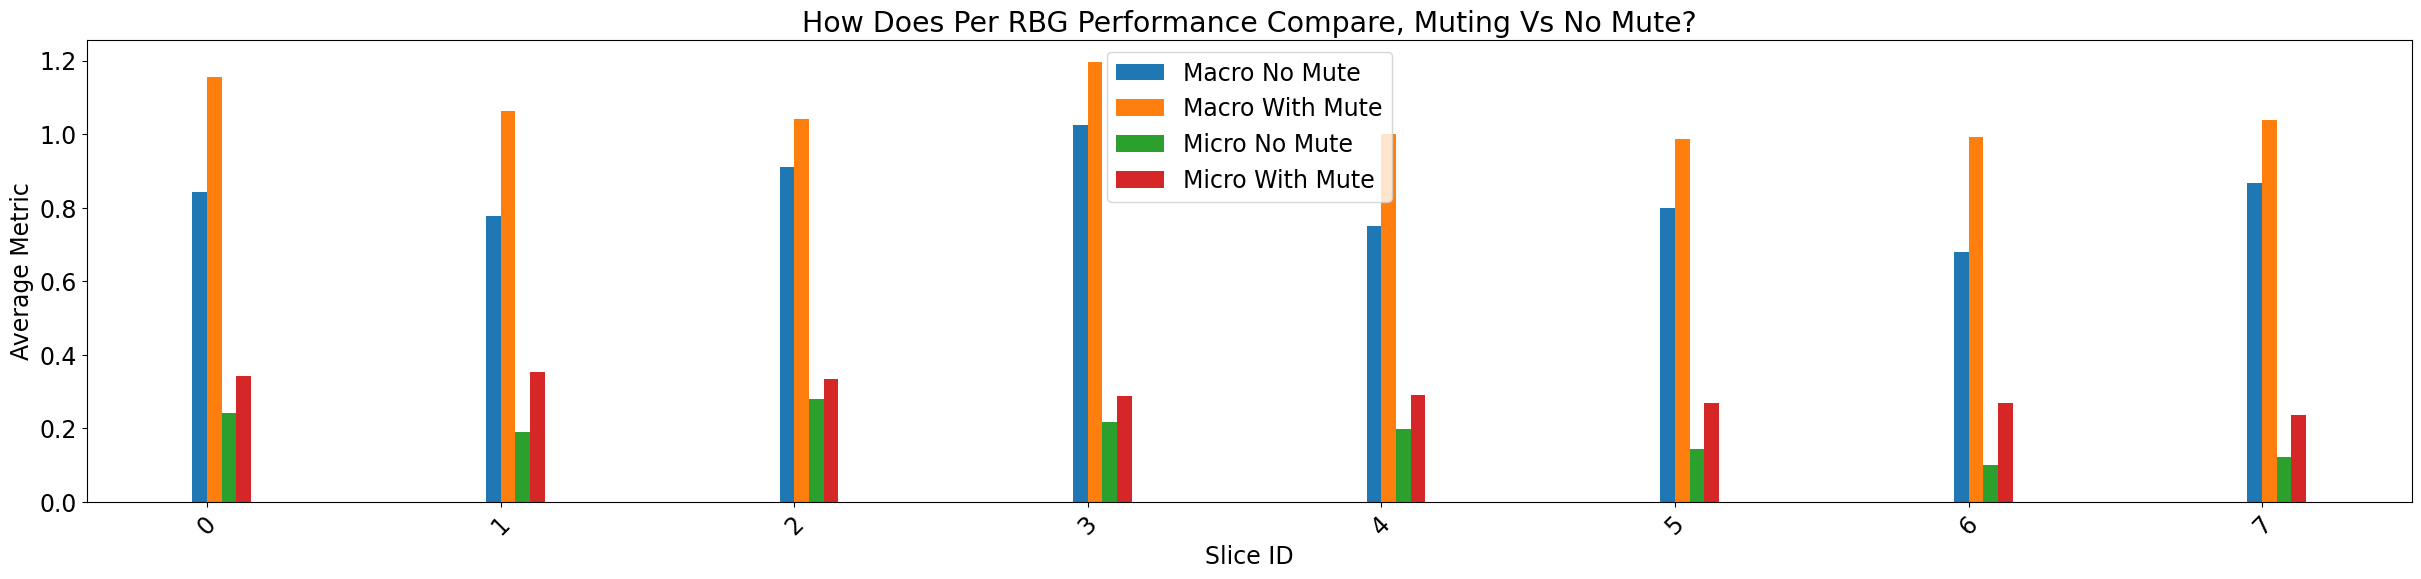

In [6]:
no_mute_macro = [0.8436137436734694, 0.7775057708163265, 0.9111864010204082, 1.0252697236734694, 0.7514285414285715, 0.7985877502040817, 0.6799873614285713, 0.867043662244898]
mute_macro = [1.155092120857195, 1.0631335650913083, 1.0418436085276728, 1.1962282405832523, 1.0008243674182917, 0.98680409132143, 0.9915253937385774, 1.0397096492550093]
no_mute_micro = [0.243025, 0.19148, 0.28121, 0.216514, 0.198519, 0.143075, 0.100331, 0.12233]
mute_micro = [0.34322898166803145, 0.35289070042676, 0.33420406443224776, 0.28756329825229576, 0.29161621523248465, 0.2701332147082125, 0.26863957450027387, 0.23707326709747875]
data = [no_mute_macro, mute_macro, no_mute_micro, mute_micro]
ticks = ['0', '1', '2', '3', '4', '5', '6', '7']
labels = ['Macro No Mute', 'Macro With Mute', 'Micro No Mute', 'Micro With Mute']
barplot_nvars(data, 'Slice ID', 'Average Metric', 'How Does Per RBG Performance Compare, Muting Vs No Mute?', labels, ticks=ticks, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])




# ticks = ['0', '1', '2', '3', '4', '5', '6', '7']
# labels = ['No Mute', 'With Mute']
# barplot_nvars(data, 'Slice ID', 'Average Metric', 'How Does Per RBG Performance Compare, Muting Vs No Mute?', labels, ticks=ticks, colors=['#1f77b4', '#ff7f0e'])

In [26]:
def sns_barplot(file, y, x, hue, title, ax,  y_tag, cols = None, labelpad = None):
    # cols = ['algo', 'seed', 'No Mute TP', 'Mute TP', 'TP imp' , 'No Mute PF', 'Mute PF', 'PF imp', 'Macro Muting Frequency', 'Micro Muting Frequency', 'Macro Muting Gain', 'Micro Muting Gain']
    if cols:
        df = pd.read_csv(file, names=cols, header=None)
    else:
        df = pd.read_csv(file)
    err = None
    seeds = df['Seed']
    seeds = ['Seed ' + str(i) for i in seeds]
    df['Seed'] = seeds
    # display(df)
    # print(df.columns)


    sns.barplot(ax = ax, data=df, hue=x, y=y, edgecolor="black", linewidth=0.1, capsize=0, 
    errorbar = err, err_kws={'color': 'black', 'linewidth': 3}, palette=sns.color_palette("Set2"),legend=False)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_xlabel('')
    ax.set_ylabel(y_tag, labelpad=labelpad)
    
    if (err):
        ax.errorbar(x=df_names_hue, y=df_tp, yerr=df_tp_std, fmt='none', ecolor='black', elinewidth=2, capsize=5)

    handles = []
    labels =[]
    colors = sns.color_palette("Set2").as_hex()
    # for i, time in enumerate(df[hue].unique()):
    #     handles += [mpatches.Patch(color=colors[i], label=f"{time}", ec='#141414', lw=1)]
    #     labels += [f"{time}"]
    # plt.figlegend(handles=handles, loc='upper center', ncol=1, fontsize=15, title=title, title_fontsize=15, borderaxespad=9.2, borderpad=-9, frameon=False)
    plt.title(title, fontsize=15, pad=20)
    # plt.legend()

In [27]:
deployment_model = 'old'
file_ = f'1.csv'
deployment_model = deployment_model.capitalize()

/tmp/ipykernel_187150/1882830711.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(ax = ax, data=df, hue=x, y=y, edgecolor="black", linewidth=0.1, capsize=0,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


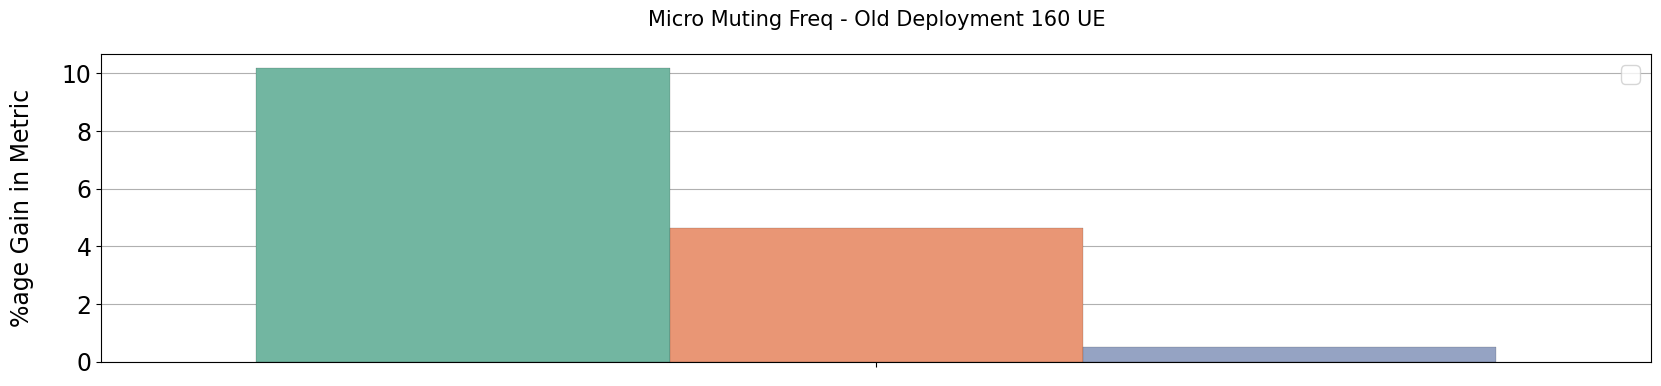

In [28]:
fig, (ax1) = plt.subplots(figsize=(20,4))
sns_barplot(file_, 'MicroMutingFrequency', 'Algo', 'Algo', f'Micro Muting Freq - {deployment_model} Deployment 160 UE',ax1, '%age Gain in Metric', labelpad = 20)
ax1.legend()

/tmp/ipykernel_84963/3083102306.py:15: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(ax = ax, data=df, x=x, y=y, hue = hue, edgecolor="black", linewidth=0.1, capsize=0,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


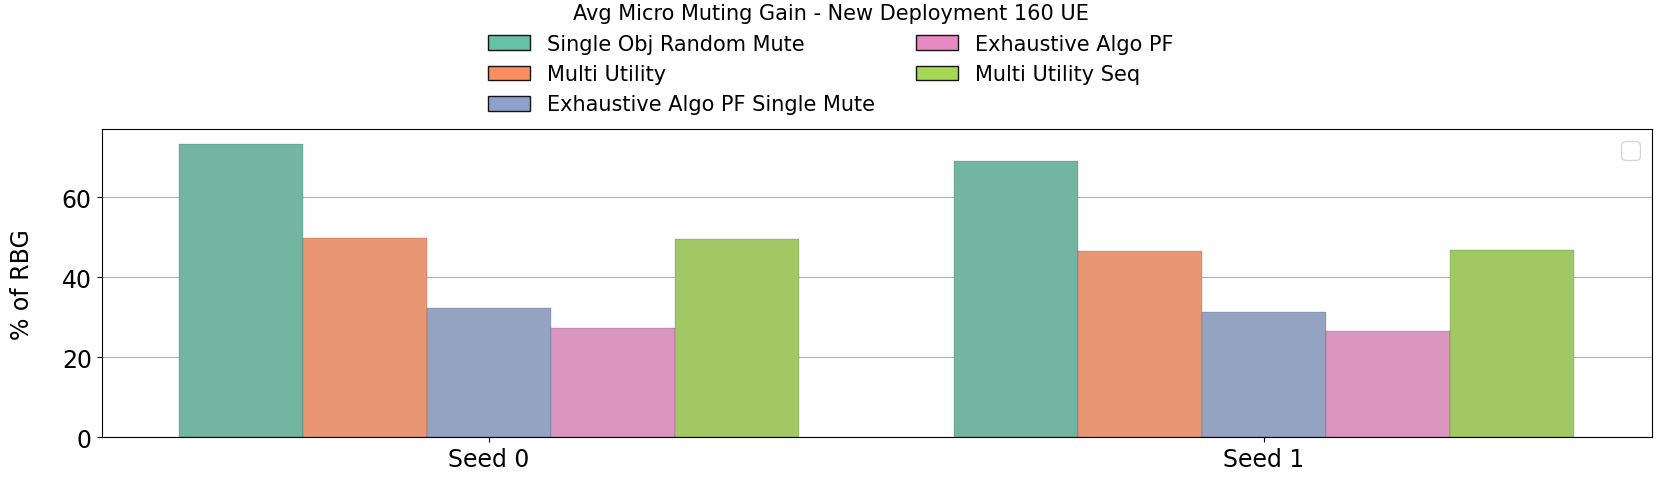

In [ ]:
fig, (ax1) = plt.subplots(figsize=(20,4))
sns_barplot(file_, 'MicroMutingGain', 'Seed', 'Algo', f'Avg Micro Muting Gain - {deployment_model} Deployment 160 UE' ,ax1, '% of RBG', labelpad = 20)
ax.legend()

5


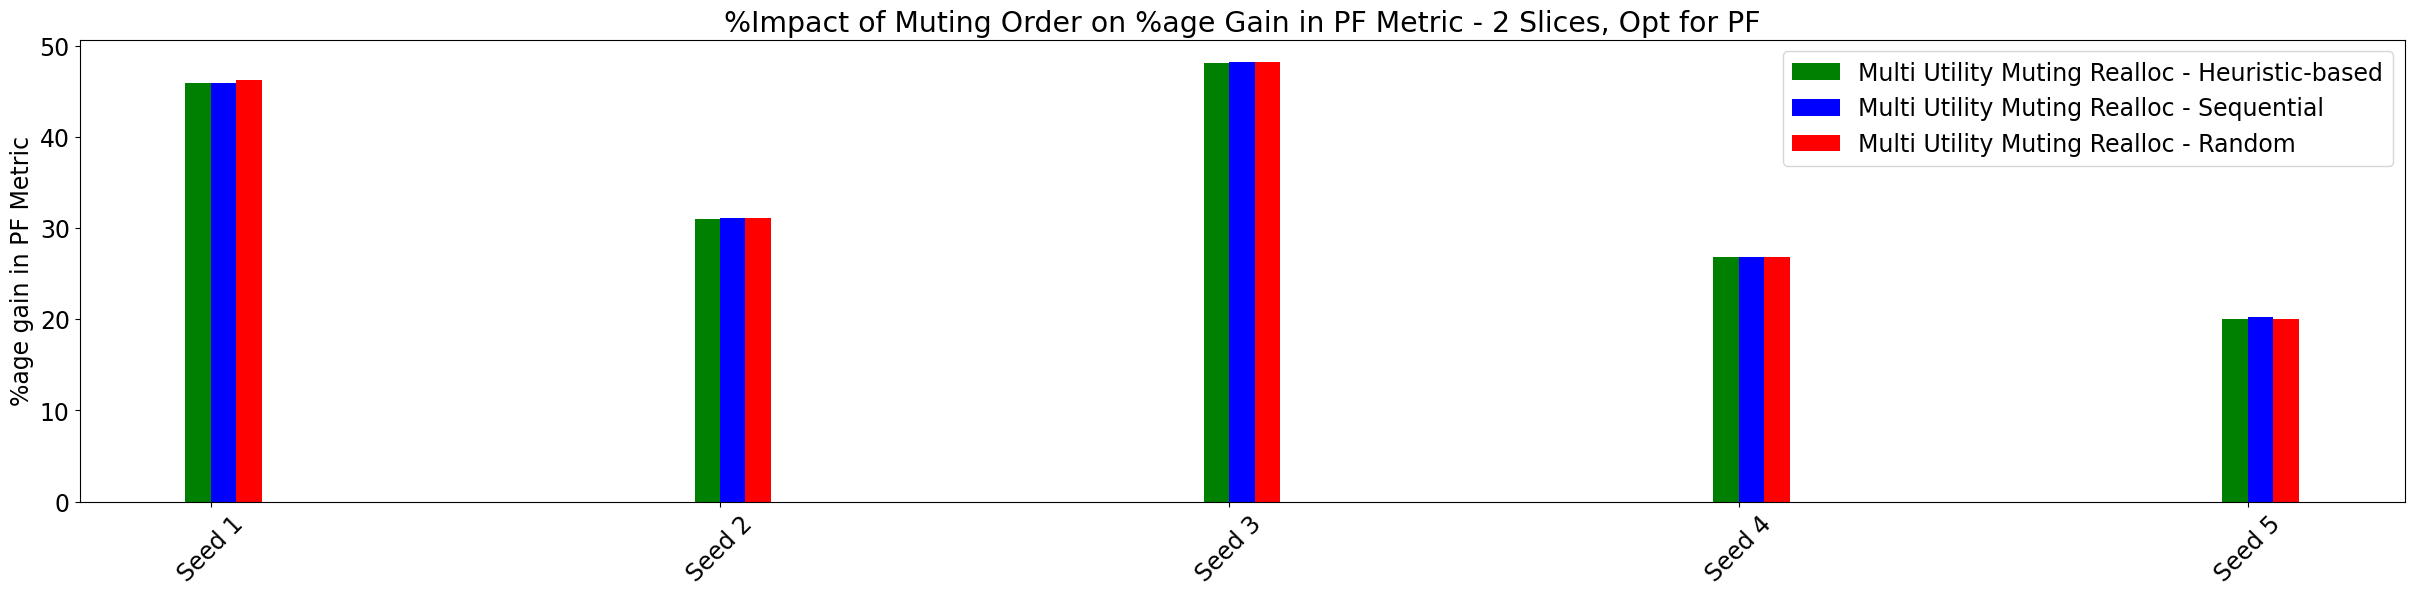

In [ ]:
mu_intelligent_realloc = [45.87, 30.94, 48.08, 26.77, 19.97]
mu_sequential_realloc = [45.94, 31.05, 48.25, 26.79, 20.28]
mu_random_realloc = [46.28, 31.06, 48.19, 26.8, 20.07]

data = [mu_intelligent_realloc, mu_sequential_realloc, mu_random_realloc]
xlabel = ''
labels = ['Multi Utility Muting Realloc - Heuristic-based', 'Multi Utility Muting Realloc - Sequential', 'Multi Utility Muting Realloc - Random']
ticks = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
colors = ['g', 'b', 'r', 'y','c']
ylabel = '%age gain in PF Metric'
title = '%Impact of Muting Order on %age Gain in PF Metric - 2 Slices, Opt for PF'
barplot_nvars(data, xlabel, ylabel, title, labels, ticks=ticks, colors = colors)


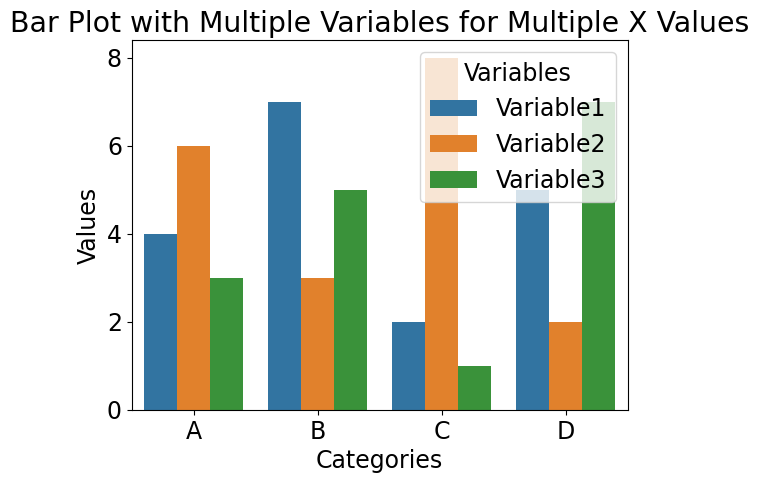

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
categories = ['A', 'B', 'C', 'D']
values1 = [4, 7, 2, 5]
values2 = [6, 3, 8, 2]
values3 = [3, 5, 1, 7]

# Create a DataFrame with the data
import pandas as pd
data = pd.DataFrame({
    'Categories': categories * 3,
    'Values': values1 + values2 + values3,
    'Variables': ['Variable1'] * len(categories) + ['Variable2'] * len(categories) + ['Variable3'] * len(categories)
})

# Create a bar plot with hue representing different variables
sns.barplot(x='Categories', y='Values', hue='Variables', data=data)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot with Multiple Variables for Multiple X Values')

# Display the plot
plt.show()


5


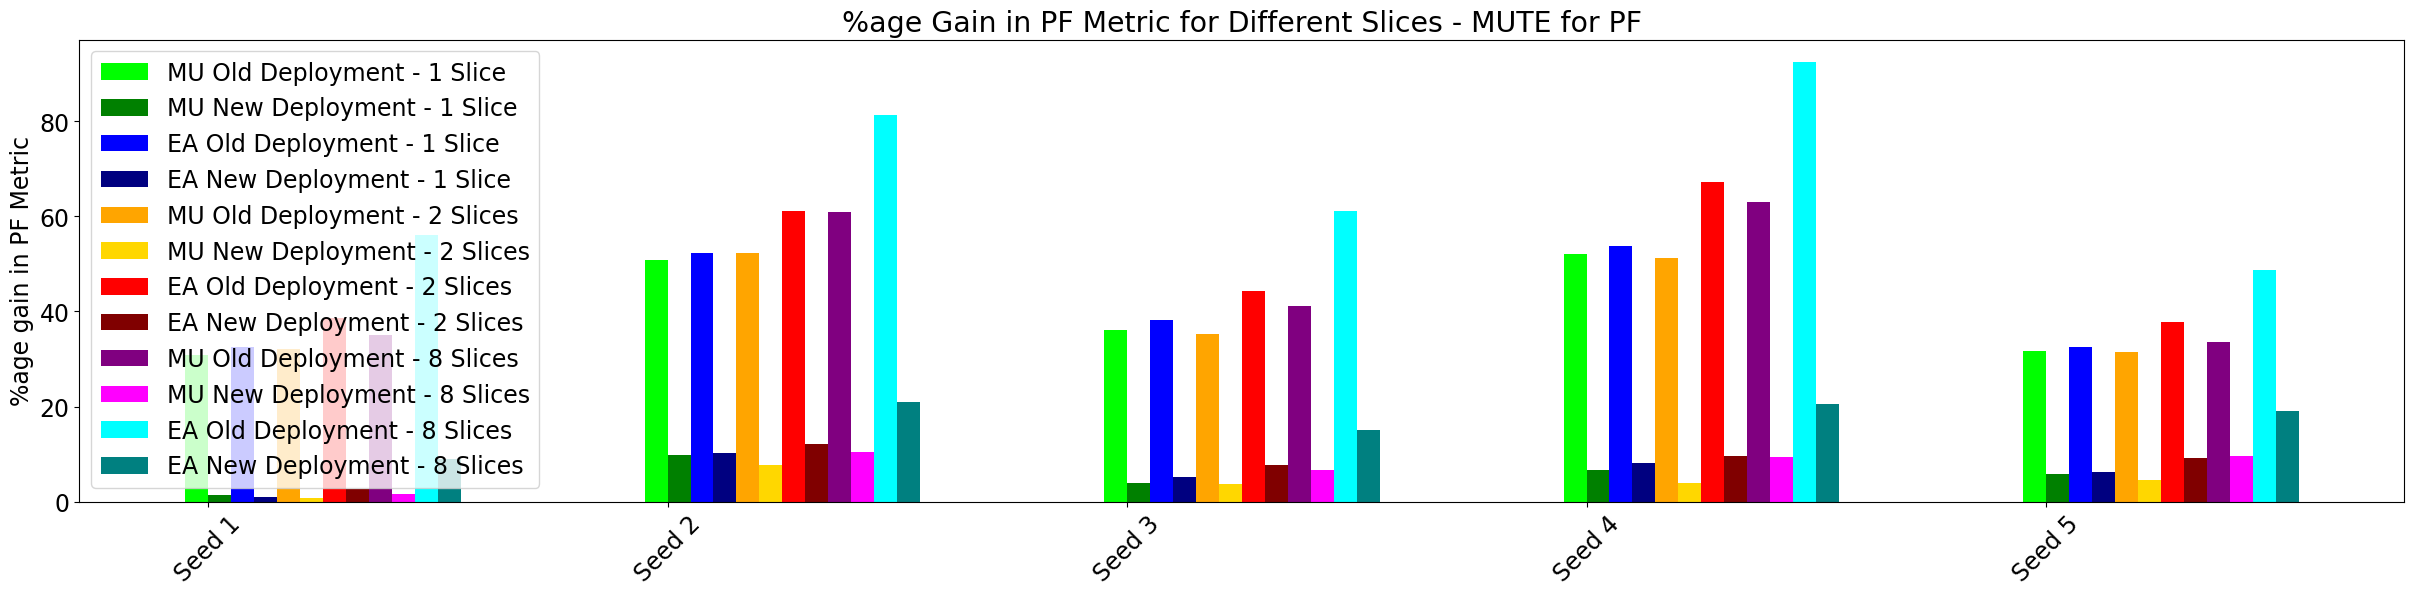

5


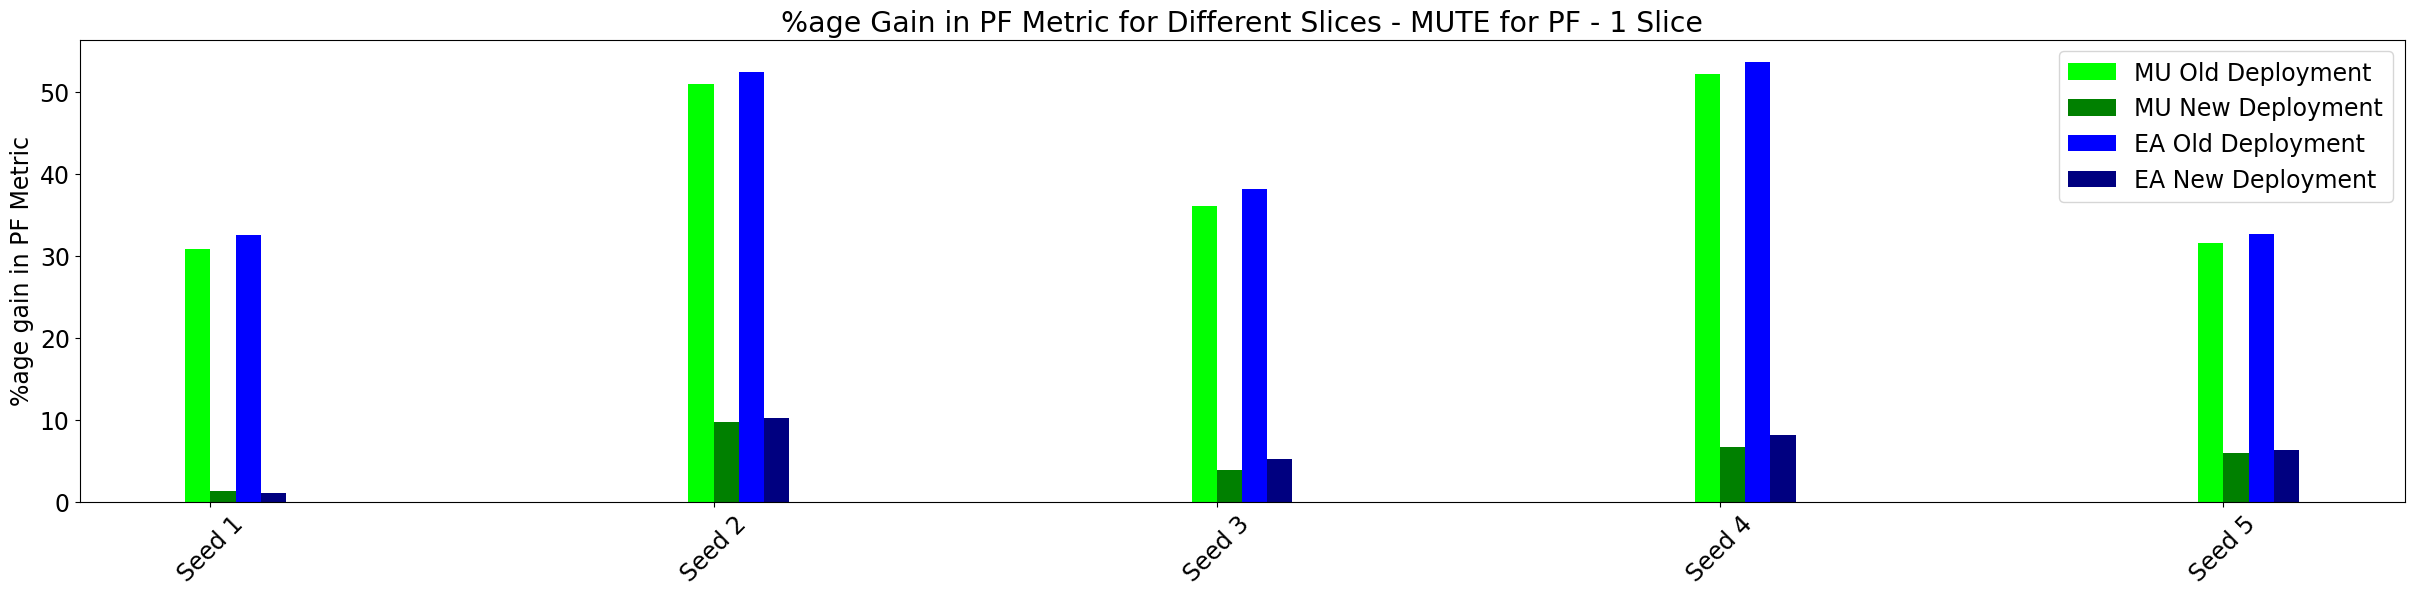

5


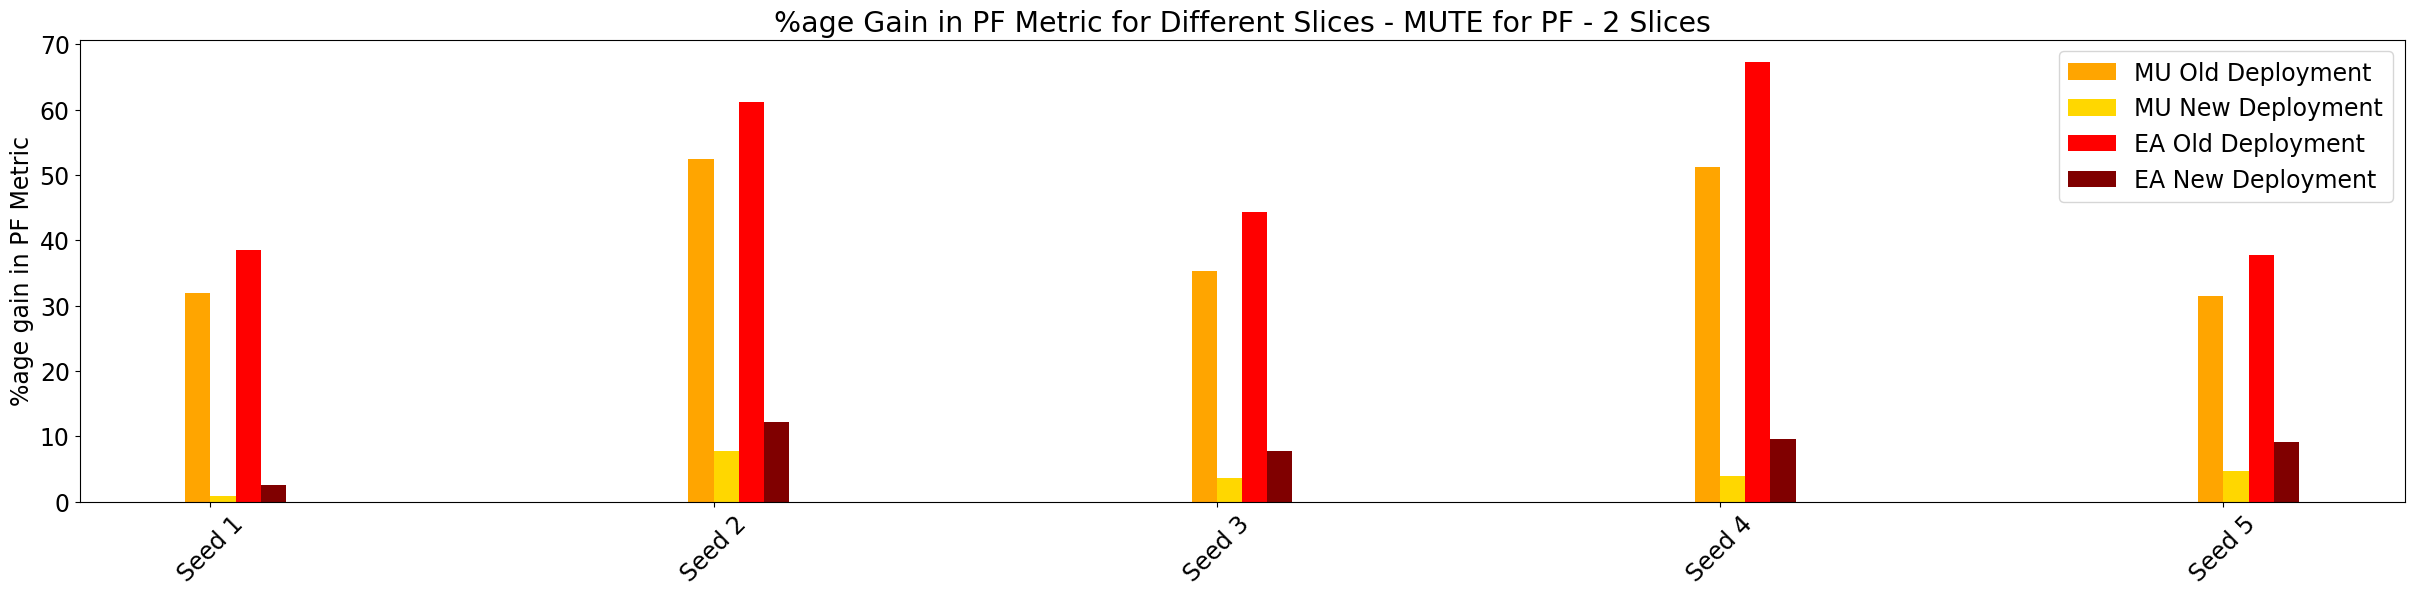

5


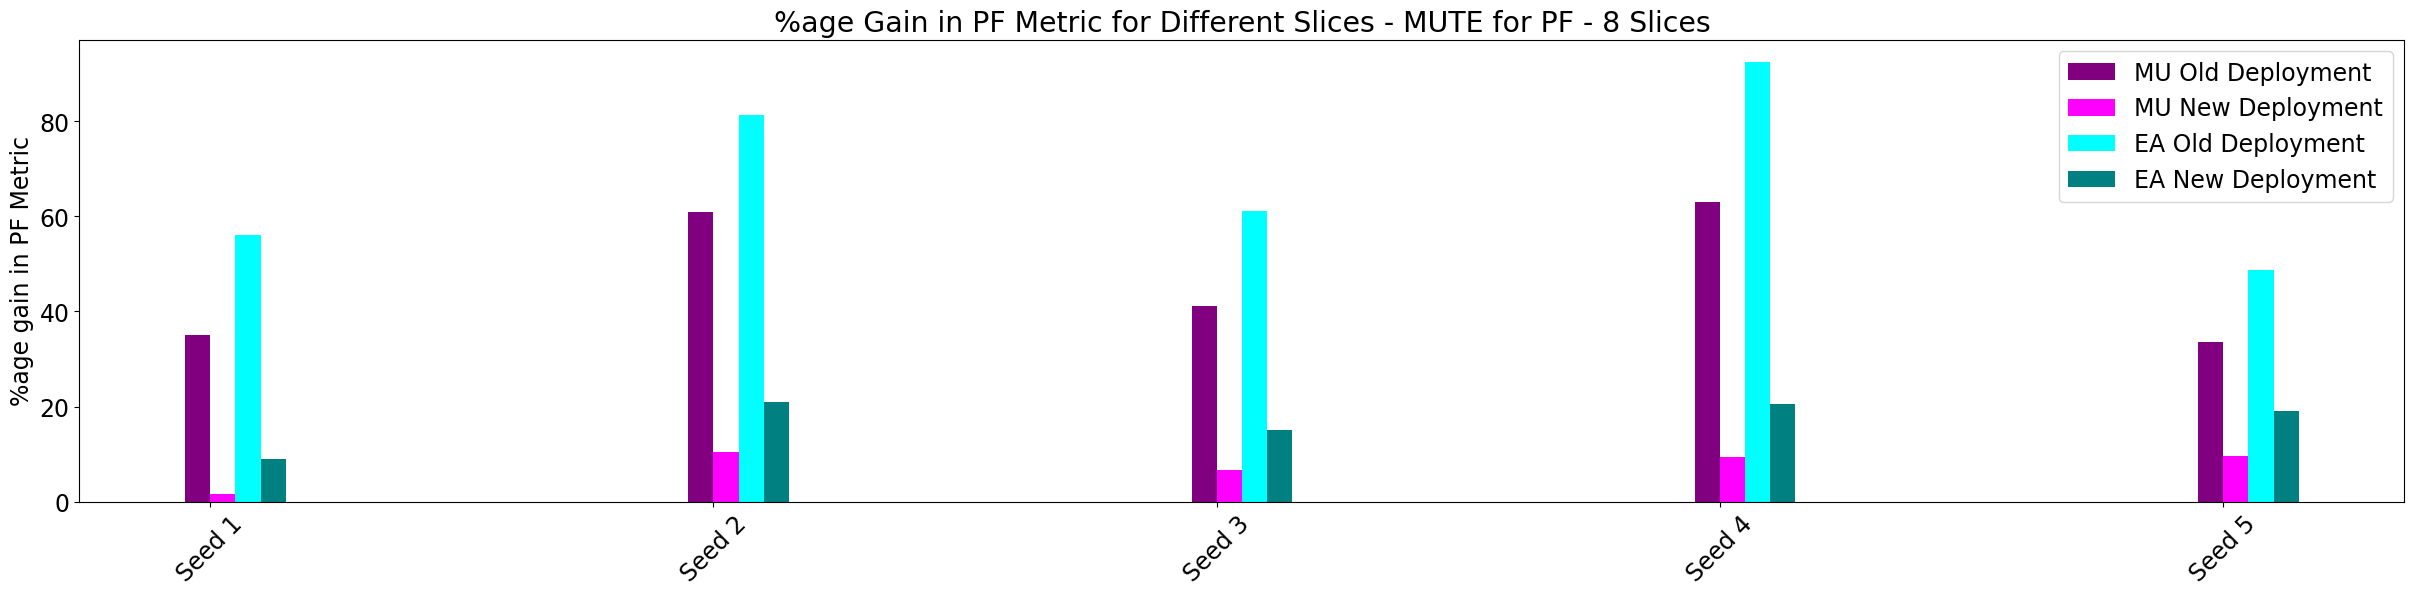

In [ ]:
# MU Old Deployment
mu_old_deployment_1slice = [30.88,50.92,36.04,52.17,31.61]
mu_new_deployment_1slice = [1.33,9.73,3.9,6.63,5.88]
ea_old_deployment_1slice = [32.55,52.4,38.11,53.69,32.62]
ea_new_deployment_1slice = [1.04,10.21,5.25,8.14,6.24]
# ------------------
mu_old_deployment_2slice = [32,52.39,35.35,51.24,31.44]
mu_new_deployment_2slice = [0.8,7.77,3.66,3.99,4.61]
ea_old_deployment_2slice = [38.54,61.15,44.3,67.34,37.69]
ea_new_deployment_2slice = [2.6,12.19,7.79,9.54,9.07]
# ------------------
mu_old_deployment_8slice = [35.15,60.88,41.25,63.13,33.52]
mu_new_deployment_8slice = [1.53,10.49,6.71,9.32,9.68]
ea_old_deployment_8slice = [56.19,81.36,61.18,92.57,48.65]
ea_new_deployment_8slice = [8.86,20.9,15.03,20.56,19.04]

data = [mu_old_deployment_1slice, mu_new_deployment_1slice, ea_old_deployment_1slice, ea_new_deployment_1slice, mu_old_deployment_2slice, mu_new_deployment_2slice, ea_old_deployment_2slice, ea_new_deployment_2slice, mu_old_deployment_8slice, mu_new_deployment_8slice, ea_old_deployment_8slice, ea_new_deployment_8slice]
xlabel = ''
labels = ['MU Old Deployment - 1 Slice', 'MU New Deployment - 1 Slice', 'EA Old Deployment - 1 Slice', 'EA New Deployment - 1 Slice', 'MU Old Deployment - 2 Slices', 'MU New Deployment - 2 Slices', 'EA Old Deployment - 2 Slices', 'EA New Deployment - 2 Slices', 'MU Old Deployment - 8 Slices', 'MU New Deployment - 8 Slices', 'EA Old Deployment - 8 Slices', 'EA New Deployment - 8 Slices']
ticks = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
colors = ['lime', 'g', 'b', 'navy','orange', 'gold', 'red', 'maroon', 'purple', 'magenta', 'cyan', 'teal']
ylabel = '%age gain in PF Metric'
title = '%age Gain in PF Metric for Different Slices - MUTE for PF'
barplot_nvars(data, xlabel, ylabel, title, labels, ticks=ticks, colors = colors)

data = [mu_old_deployment_1slice, mu_new_deployment_1slice, ea_old_deployment_1slice, ea_new_deployment_1slice]
xlabel = ''
labels = ['MU Old Deployment', 'MU New Deployment', 'EA Old Deployment', 'EA New Deployment']
ticks = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
colors = ['lime', 'g', 'b', 'navy']
ylabel = '%age gain in PF Metric'
title = '%age Gain in PF Metric for Different Slices - MUTE for PF - 1 Slice'
barplot_nvars(data, xlabel, ylabel, title, labels, ticks=ticks, colors = colors)

data = [mu_old_deployment_2slice, mu_new_deployment_2slice, ea_old_deployment_2slice, ea_new_deployment_2slice]
xlabel = ''
labels = ['MU Old Deployment', 'MU New Deployment', 'EA Old Deployment', 'EA New Deployment']
ticks = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
colors = ['orange', 'gold', 'red', 'maroon']
ylabel = '%age gain in PF Metric'
title = '%age Gain in PF Metric for Different Slices - MUTE for PF - 2 Slices'
barplot_nvars(data, xlabel, ylabel, title, labels, ticks=ticks, colors = colors)

data = [mu_old_deployment_8slice, mu_new_deployment_8slice, ea_old_deployment_8slice, ea_new_deployment_8slice]
xlabel = ''
labels = ['MU Old Deployment', 'MU New Deployment', 'EA Old Deployment', 'EA New Deployment']
ticks = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
colors = ['purple', 'magenta', 'cyan', 'teal']
ylabel = '%age gain in PF Metric'
title = '%age Gain in PF Metric for Different Slices - MUTE for PF - 8 Slices'
barplot_nvars(data, xlabel, ylabel, title, labels, ticks=ticks, colors = colors)

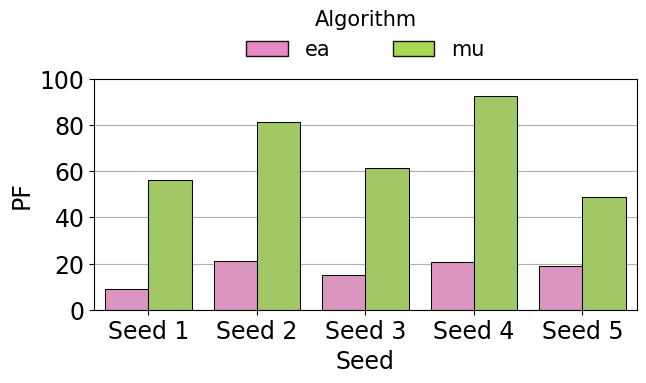

In [ ]:
data = pd.DataFrame({ 'Algorithm': data_names_hue, 'Seed': seed_hue, 'PF': datas})

fig, ax = plt.subplots(figsize=(7, 3))

sns.barplot(ax=ax, x='Seed', y='PF', hue='Algorithm', data=data, errorbar="ci", estimator="mean",
            edgecolor="black", linewidth=0.75, errwidth=3, errcolor="black", capsize=0,
            hue_order=['ea', 'mu'],
            palette=[sns.color_palette("Set2").as_hex()[3], sns.color_palette("Set2").as_hex()[4]])

handles = []
colors = [sns.color_palette("Set2").as_hex()[3], sns.color_palette("Set2").as_hex()[4]]
for i, time in enumerate(['ea', 'mu']):
    handles += [mpatches.Patch(color=colors[i], label=f"{time}", ec='#141414', lw=1)]

ax.grid(axis='y')
ax.set_axisbelow(True)

ax.legend(handles=handles,
        loc='upper center', bbox_to_anchor=(0.5, 1.30),
        ncol=2, columnspacing=3,
        fontsize=15,
        title='Algorithm', title_fontsize=15,
        borderaxespad=0., borderpad=0., frameon=False)

ticks = range(0, 100+1, 20)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

plt.show()

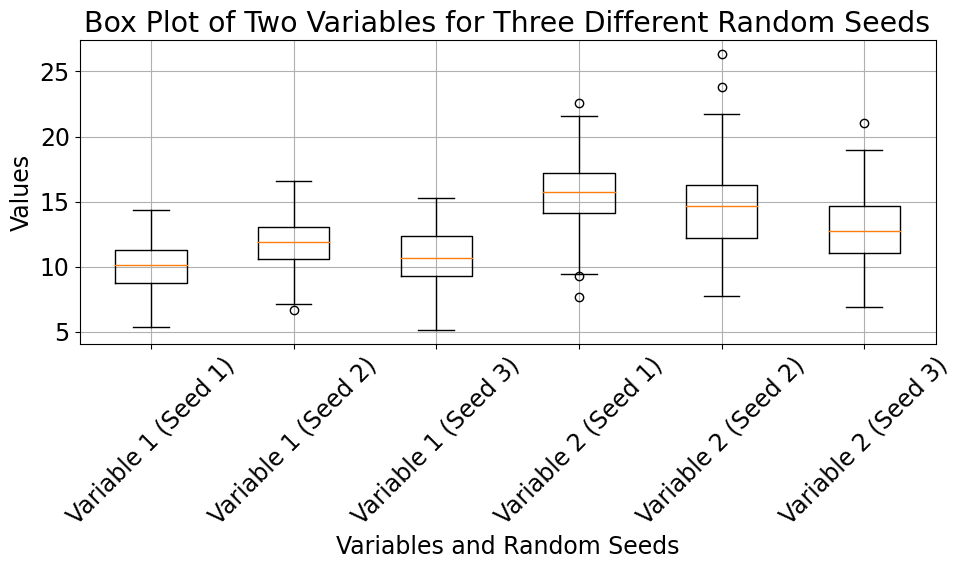

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of data points for each variable
num_points = 100

# Generate random data for the two variables and three different random seeds
np.random.seed(1)
variable1_seed1 = np.random.normal(loc=10, scale=2, size=num_points)
variable2_seed1 = np.random.normal(loc=15, scale=3, size=num_points)

np.random.seed(2)
variable1_seed2 = np.random.normal(loc=12, scale=2, size=num_points)
variable2_seed2 = np.random.normal(loc=14, scale=3, size=num_points)

np.random.seed(3)
variable1_seed3 = np.random.normal(loc=11, scale=2, size=num_points)
variable2_seed3 = np.random.normal(loc=13, scale=3, size=num_points)

# Organize the data for the box plot
data = [variable1_seed1, variable1_seed2, variable1_seed3, 
        variable2_seed1, variable2_seed2, variable2_seed3]

# Labels for the box plot
labels = ['Variable 1 (Seed 1)', 'Variable 1 (Seed 2)', 'Variable 1 (Seed 3)',
          'Variable 2 (Seed 1)', 'Variable 2 (Seed 2)', 'Variable 2 (Seed 3)']

# Create a box plot for the two variables and three random seeds
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.xlabel('Variables and Random Seeds')
plt.ylabel('Values')
plt.title('Box Plot of Two Variables for Three Different Random Seeds')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


NameError: name 'get_per_throughput' is not defined